In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from nltk import download
download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM
from keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/sentiment/datatraining.csv")
print(data.shape)
data.head()

(2904, 4)


,nama,tanggal,ulasan,label
0,Joleen Lamaro,2021-07-08,Aplikasi ini akan membantu dengan cara yang mu...,1
1,Leah Pejida,2021-07-12,Platform belanja online ini didesain sempurna ...,1
2,RACHEL RAYMUNDO,2021-07-09,Suka! memiliki aplikasi ini selama bertahun-ta...,1
3,moi dudzki,2021-07-12,Situs belanja online yang mudah dinavigasi.. p...,1
4,Marjo yang luar biasa,2021-07-12,Aplikasi ini luar biasa! Ini jelas menunjukkan...,1


In [ ]:
# Check for any nulls values
data.isnull().sum()

nama       0
tanggal    0
ulasan     0
label      0
dtype: int64

In [ ]:
stop_words = set(stopwords.words('indonesian')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['ulasan']:
    cleaned_text.append(text_cleaner(t))

In [ ]:
print(data.shape)

(2904, 4)


In [ ]:
X = []
sentences = list(data['ulasan'])
for sen in sentences:
    X.append(text_cleaner(sen))

In [ ]:
X[3]

'situs belanja online mudah dinavigasi pemenang game mekanismenya suka promosi diskon ditawarkan pikir satunya kejatuhan goyang muncul mengguncangnya voucher diganti dompet lazada voucher transaksi bermanfaat mengizinkannya sumbangan terima kasih'

In [ ]:
y = data['label']

In [ ]:
y[1]

1

In [ ]:
print(data.shape)

(2904, 4)


**bagi** **dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**lapisan** **embedding**

In [ ]:
top_words = 10000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)
list_tokenized_train = tokenizer.texts_to_sequences(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

max_review_length = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_review_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_review_length)

vocab_size

3272

In [ ]:
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)

Shape of train data: (2323, 100)
Shape of Test data: (581, 100)


**create** **model** **CNNLSTM**

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50
15/15 [==============================] - 5s 349ms/step - loss: 0.3977 - accuracy: 0.8418 - val_loss: 0.5231 - val_accuracy: 0.7677
Epoch 2/50
15/15 [==============================] - 3s 201ms/step - loss: 0.3903 - accuracy: 0.8439 - val_loss: 0.5013 - val_accuracy: 0.7720
Epoch 3/50
15/15 [==============================] - 3s 177ms/step - loss: 0.3717 - accuracy: 0.8563 - val_loss: 0.5092 - val_accuracy: 0.7720
Epoch 4/50
15/15 [==============================] - 3s 174ms/step - loss: 0.3818 - accuracy: 0.8466 - val_loss: 0.5032 - val_accuracy: 0.7699
Epoch 5/50
15/15 [==============================] - 3s 177ms/step - loss: 0.3842 - accuracy: 0.8455 - val_loss: 0.4953 - val_accuracy: 0.7785
Epoch 6/50
15/15 [==============================] - 3s 173ms/step - loss: 0.3510 - accuracy: 0.8692 - val_loss: 0.4887 - val_accuracy: 0.7914
Epoch 7/50
15/15 [==============================] - 3s 174ms/step - loss: 0.3326 - accuracy: 0.8832 - val_loss: 0.4953 - val_accuracy: 0.7957
Epoch 

In [ ]:
test = pd.read_csv("test_tokped.csv")

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1,batch_size = 256)
print("Accuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 0s 48ms/step - loss: 0.4618 - accuracy: 0.8451
Accuracy: 84.51%


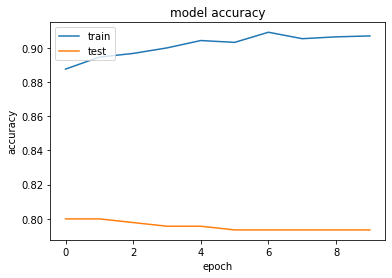

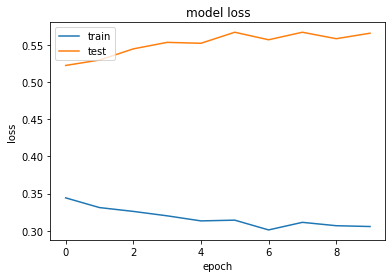

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
instance = X_test

In [ ]:
X_test = test['prepro']

In [ ]:
X[1]

'pasar bagus menemukan membandingkan harga bagus penjual bagus menemukan penjual buruk nyaman pindah seller susah seller bagus tokopedia menilai tokopedia buruk penjual buruk buruknya normal tokopedia terbaik terima kasih tokped tim terbaik cinta'

In [ ]:
instance = tokenizer.texts_to_sequences(instance)

instance = pad_sequences(instance, padding='post', maxlen=max_review_length)

In [ ]:
class1 = model.predict(instance)
for i in range(0, 100):
    print ('Review:', X[i])
    print ('probability:',class1[i])

In [ ]:
model.save("modelbismillah.h5")

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('sentiment.model','wb'))

INFO:tensorflow:Assets written to: ram://bba8270b-466e-4d87-b692-d03d713534b8/assets


In [ ]:
X = data['ulasan'].astype(str)

In [ ]:
test = X

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend
graph = tf.compat.v1.get_default_graph()

In [ ]:
class1 = model.predict(instance)
for i in range(0, 400):
    print ('Review:', X[i])
    print ('probability:',class1[i])

Review: aplikasi membantu mudah membantu orang orang pasar berguna pengalaman bagus toko legit menjual produk berkualitas harga murah bijak menemukan toko penjual bagus penilaian gambar kuncinya salah toko belanja mudah dinavigasi penjualan potongan harga kupon voucher gratis
probability: [0.9589722]
Review: platform belanja online didesain sempurna pelanggan memilih berbelanja online rumah pandemi fitur terpuji aplikasi pengirimannya barang pesan tanggal dikirim pertumbuhan kesuksesan berkelanjutan kesenangan pengalaman terima kasih lazada
probability: [0.9589716]
Review: suka memiliki aplikasi bertahun aplikasi pandemi lazada membuatnya nyaman pengiriman cepat produk asli harga terjangkau diskon bantuan app dimiliki orang
probability: [0.95896506]
Review: situs belanja online mudah dinavigasi pemenang game mekanismenya suka promosi diskon ditawarkan pikir satunya kejatuhan goyang muncul mengguncangnya voucher diganti dompet lazada voucher transaksi bermanfaat mengizinkannya sumbangan

In [ ]:
pickle.dump(model, open('sentiment.model','wb'))

INFO:tensorflow:Assets written to: ram://8bfd8b61-dd2d-491f-84fa-e34a19cbbb01/assets


In [ ]:
import pickle

In [ ]:
listdata = data['ulasan'].values.astype('U')